根据ImageNet提供的猫狗分类标签，狗有118类，猫有7类，具体标签如下：

In [1]:
dog_labels = [
 'n02085620','n02085782','n02085936','n02086079','n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364','n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721','n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339','n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258','n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437','n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105','n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236','n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177','n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251','n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550','n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089','n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185','n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889','n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712','n02113799','n02113978']

cat_labels = [
'n02123045','n02123159','n02123394','n02123597','n02124075','n02125311','n02127052']
print('狗的种类：',len(dog_labels))
print('猫的种类：',len(cat_labels))

狗的种类： 118
猫的种类： 7


In [22]:
from keras.models import Sequential, Model
from keras.preprocessing import image
import random
import os
import numpy as np
import math
import json

import matplotlib.pyplot as plt
%matplotlib inline

该方法通过传入指定的预训练模型，获取训练集对应的异常图片,data_dir传入整个训练集train

In [8]:
from tqdm import tqdm

def get_outliers(MODEL,input_size,pre_process_func,decode_func,data_dir,data_size=None,top_n=10):
    model = MODEL(weights='imagenet')
    
    file_list = os.listdir(data_dir)
    
    if data_size and data_size < len(file_list):
        idxs = random.sample(range(len(file_list)), data_size)
        file_list = [file_list[i] for i in idxs]
    
    out_liers = []
    for file in tqdm(file_list):
        img = image.load_img(data_dir + os.sep + file, target_size=input_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = pre_process_func(x)
        pred = model.predict(x)
        top_n_classes = decode_func(pred, top=top_n)[0]

        if file[0:3] == 'dog':
            cls_labels = dog_labels
        else:
            cls_labels = cat_labels
        
        flag = False
        for cls_tuple in top_n_classes:
            if cls_tuple[0] in cls_labels:
                flag = True
                break
        if not flag:
            out_liers.append(file)
    
    return out_liers

显示图片类表

In [23]:
def display_img_list(data_dir, img_list, fig_w=5):
    img_num = len(img_list)
    fig_h = math.ceil(img_num/fig_w)
    plt.figure(figsize=(18, 5*fig_h))
    for i in range(img_num):
        if os.path.exists(data_dir + os.sep + img_list[i]):
            plt.subplot(fig_h, fig_w, i+1)
            plt.gca().set_title(img_list[i])
            plt.imshow(image.load_img(data_dir + os.sep + img_list[i]))
    plt.show()

使用预训练模型InceptionV3获取异常图片

  0%|          | 0/25000 [00:00<?, ?it/s]

40960/35363 [==================================] - 0s 5us/step


100%|██████████| 25000/25000 [20:35<00:00, 20.23it/s]


InceptionV3预测异常图片数量 67


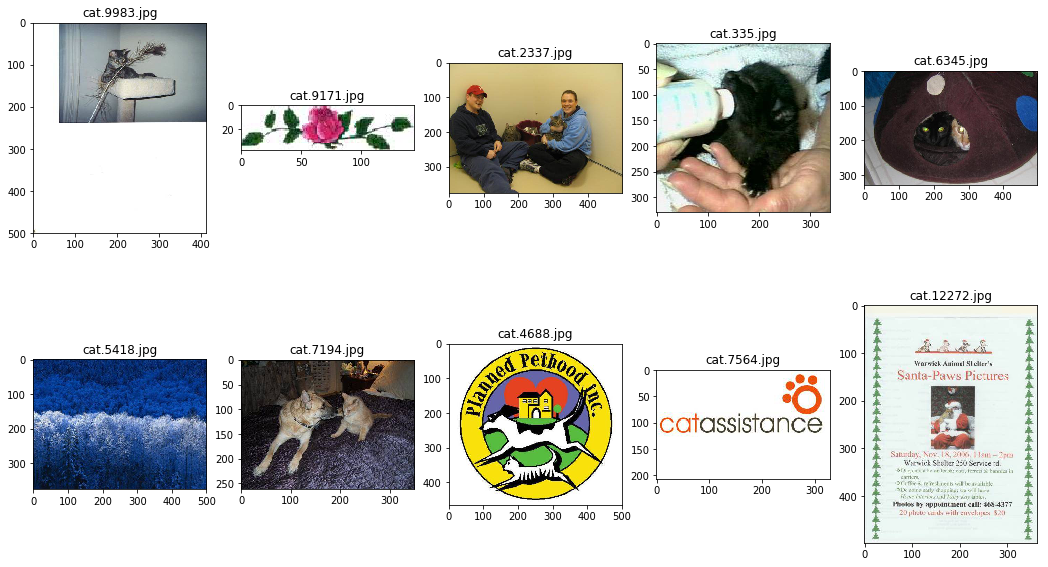

In [10]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications import inception_v3
outliers1 = get_outliers(InceptionV3, (299, 299), inception_v3.preprocess_input, inception_v3.decode_predictions, "train", top_n=60)
print('InceptionV3预测异常图片数量',len(outliers1))
display_img_list("train", outliers1[:10])

保存异常图片文件名

In [11]:
out_file = "outliers_InceptionV3.json"
with open(out_file, 'w') as f:
    json.dump({'outliers':outliers1}, f)

使用预训练模型ResNet50获取异常图片

102858752/102853048 [==============================] - 1s 0us/step


100%|██████████| 25000/25000 [14:23<00:00, 28.95it/s]


ResNet50预测异常图片数量 127


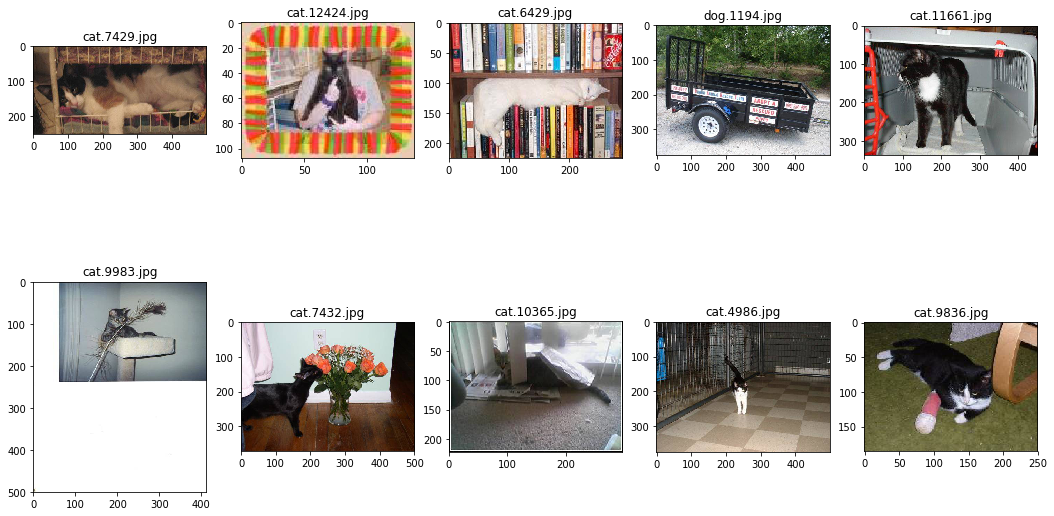

In [12]:
from keras.applications.resnet50 import ResNet50
from keras.applications import resnet50

outliers2 = get_outliers(ResNet50, (224, 224), resnet50.preprocess_input, resnet50.decode_predictions, "train", top_n=60)
print('ResNet50预测异常图片数量',len(outliers2))
display_img_list("train", outliers2[:10])

保存异常图片文件名

In [13]:
out_file = "outliers_ResNet50.json"
with open(out_file, 'w') as f:
    json.dump({'outliers':outliers2}, f)

使用预训练模型Xception获取异常图片

100%|██████████| 25000/25000 [19:47<00:00, 21.05it/s]


Xception预测异常图片数量： 67


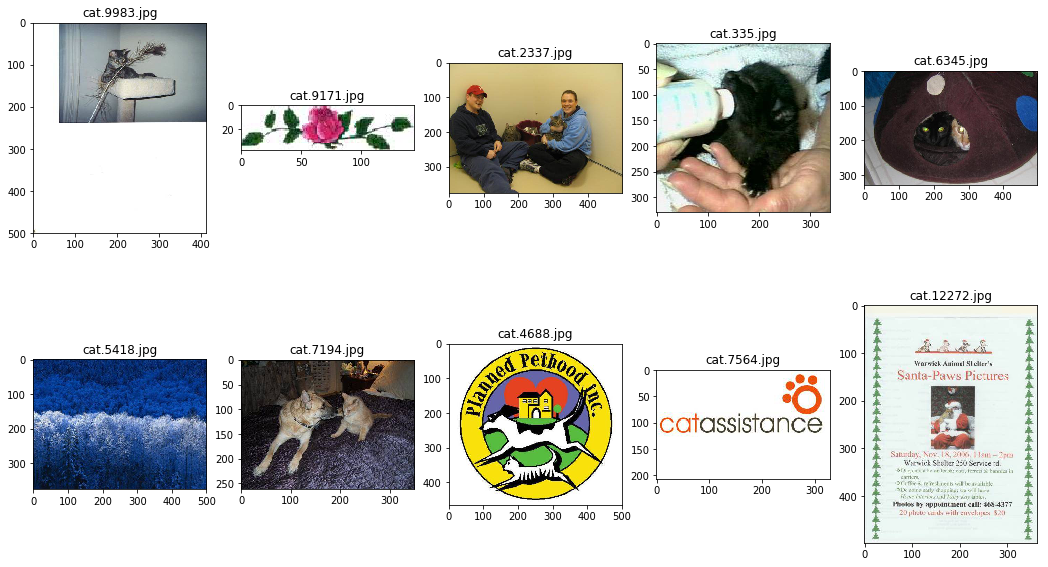

In [14]:
from keras.applications.xception import Xception
from keras.applications import xception

outliers3 = get_outliers(InceptionV3, (299, 299), inception_v3.preprocess_input, inception_v3.decode_predictions, "train", top_n=60)
print('Xception预测异常图片数量：',len(outliers3))
display_img_list("train", outliers3[:10])

In [15]:
out_file = "outliers_Xception.json"
with open(out_file, 'w') as f:
    json.dump({'outliers':outliers3}, f)

In [16]:
#从文件读取异常图片文件名
def read_data(filename):
    with open(filename, 'r') as f:
        data_dict = json.load(f)
    outliers = data_dict['outliers']
    
    return outliers

In [29]:
#获取总的异常图片
total_outliers = read_data("outliers_Xception.json")
total_outliers = total_outliers + read_data("outliers_InceptionV3.json")
total_outliers = list(set(total_outliers))
print('the total number of outliers:',len(total_outliers))
print(total_outliers)
#display_img_list("train", total_outliers)

the total number of outliers: 67
['cat.5355.jpg', 'dog.6475.jpg', 'dog.1895.jpg', 'cat.9983.jpg', 'cat.9171.jpg', 'cat.2509.jpg', 'cat.7920.jpg', 'cat.2433.jpg', 'cat.12378.jpg', 'cat.2893.jpg', 'dog.5604.jpg', 'cat.335.jpg', 'cat.7671.jpg', 'cat.6699.jpg', 'dog.4367.jpg', 'cat.2939.jpg', 'dog.10801.jpg', 'cat.6442.jpg', 'cat.2621.jpg', 'cat.10712.jpg', 'dog.10237.jpg', 'cat.1485.jpg', 'cat.8470.jpg', 'cat.12227.jpg', 'cat.3731.jpg', 'cat.5820.jpg', 'cat.6402.jpg', 'cat.8854.jpg', 'cat.8921.jpg', 'dog.2614.jpg', 'cat.10029.jpg', 'cat.7487.jpg', 'cat.3216.jpg', 'cat.8456.jpg', 'cat.7194.jpg', 'cat.5418.jpg', 'cat.7411.jpg', 'cat.10946.jpg', 'cat.11565.jpg', 'cat.5351.jpg', 'cat.7377.jpg', 'cat.10700.jpg', 'cat.4833.jpg', 'cat.9456.jpg', 'cat.4688.jpg', 'cat.3738.jpg', 'cat.2457.jpg', 'cat.7564.jpg', 'cat.4965.jpg', 'cat.5527.jpg', 'cat.3845.jpg', 'cat.4338.jpg', 'cat.4852.jpg', 'cat.5324.jpg', 'cat.11184.jpg', 'cat.6915.jpg', 'cat.2337.jpg', 'cat.7968.jpg', 'cat.6345.jpg', 'dog.10161.jp

In [31]:
#保存总的异常数据
out_file = "total_outliers.json"
with open(out_file, 'w') as f:
    json.dump({'outliers':total_outliers}, f)